In [1]:
from get_features import get_dataframes
dataframe = get_dataframes()
print(get_dataframes.__doc__)
help(get_dataframes)




    gets cells that requires recontruction and matches specimen id and returns the cells ephys features

    Args: 
        recon_bool (bool), optional: determines whether cell should require reconstruction

    Returns:
        Dataframe: dataframe of cells and their features
    
Help on function get_dataframes in module get_features:

get_dataframes(recon_bool=True)
    gets cells that requires recontruction and matches specimen id and returns the cells ephys features
    
    Args: 
        recon_bool (bool), optional: determines whether cell should require reconstruction
    
    Returns:
        Dataframe: dataframe of cells and their features



In [2]:
import pandas as pd
from allensdk.core.cell_types_cache import CellTypesCache
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

cells = ctc.get_cells(require_reconstruction = True)

cell_index = { c['id']: c for c in cells }
print(cell_index[485909730].keys())
print(cell_index[485909730])
label_features = ["id", "species", "structure_layer_name", "structure_area_abbrev", "dendrite_type", "donor_id"]

all_ids = [[item[feature] for feature in label_features] for item in cells]
print(all_ids)

dataframe_labels = pd.DataFrame(all_ids, columns = label_features)
#print(dataframe_labels)

filtered_dataframe_labels = dataframe_labels[dataframe_labels["dendrite_type"].isin(["spiny", "aspiny"])]
print(filtered_dataframe_labels)
print(filtered_dataframe_labels["dendrite_type"].unique())



dict_keys(['reporter_status', 'cell_soma_location', 'species', 'id', 'name', 'structure_layer_name', 'structure_area_id', 'structure_area_abbrev', 'transgenic_line', 'dendrite_type', 'apical', 'reconstruction_type', 'disease_state', 'donor_id', 'structure_hemisphere', 'normalized_depth'])
{'reporter_status': 'positive', 'cell_soma_location': [8881.0, 953.839501299405, 7768.22695782726], 'species': 'Mus musculus', 'id': 485909730, 'name': 'Cux2-CreERT2;Ai14-205530.03.02.01', 'structure_layer_name': '5', 'structure_area_id': 385, 'structure_area_abbrev': 'VISp', 'transgenic_line': 'Cux2-CreERT2', 'dendrite_type': 'spiny', 'apical': 'intact', 'reconstruction_type': 'dendrite-only', 'disease_state': '', 'donor_id': 485250100, 'structure_hemisphere': 'right', 'normalized_depth': 0.478343598387418}
[[485909730, 'Mus musculus', '5', 'VISp', 'spiny', 485250100], [323865917, 'Mus musculus', '5', 'VISp', 'spiny', 322489588], [476135066, 'Mus musculus', '4', 'VISp', 'spiny', 475849748], [50261442

In [3]:
print(cells[0].keys())
print(cells[0]["donor_id"])
print(cells[0]["id"])

dict_keys(['reporter_status', 'cell_soma_location', 'species', 'id', 'name', 'structure_layer_name', 'structure_area_id', 'structure_area_abbrev', 'transgenic_line', 'dendrite_type', 'apical', 'reconstruction_type', 'disease_state', 'donor_id', 'structure_hemisphere', 'normalized_depth'])
485250100
485909730


In [4]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le1.fit(filtered_dataframe_labels['dendrite_type'])
print(le1.classes_)
filtered_dataframe_labels['dendrite_type_number'] = le1.transform(filtered_dataframe_labels['dendrite_type'])
print(filtered_dataframe_labels[["dendrite_type", "dendrite_type_number"]])

le2.fit(filtered_dataframe_labels['structure_layer_name'])
print(le2.classes_)
filtered_dataframe_labels['structure_layer_name_number'] = le2.transform(filtered_dataframe_labels['structure_layer_name'])
print(filtered_dataframe_labels[["structure_layer_name", "structure_layer_name_number"]])

le3.fit(filtered_dataframe_labels['species'])
print(le3.classes_)
filtered_dataframe_labels['species_number'] = le3.transform(filtered_dataframe_labels['species'])
print(filtered_dataframe_labels[["species_number", "species_number"]])

['aspiny' 'spiny']
    dendrite_type  dendrite_type_number
0           spiny                     1
1           spiny                     1
2           spiny                     1
3           spiny                     1
4           spiny                     1
..            ...                   ...
662        aspiny                     0
663        aspiny                     0
664         spiny                     1
665         spiny                     1
666        aspiny                     0

[618 rows x 2 columns]
['1' '2' '2/3' '3' '4' '5' '6' '6a' '6b']
    structure_layer_name  structure_layer_name_number
0                      5                            5
1                      5                            5
2                      4                            4
3                      4                            4
4                      3                            3
..                   ...                          ...
662                    5                            5
663

C:\Users\lynnh\AppData\Local\Temp\ipykernel_22752\127906441.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataframe_labels['dendrite_type_number'] = le1.transform(filtered_dataframe_labels['dendrite_type'])
C:\Users\lynnh\AppData\Local\Temp\ipykernel_22752\127906441.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataframe_labels['structure_layer_name_number'] = le2.transform(filtered_dataframe_labels['structure_layer_name'])
C:\Users\lynnh\AppData\Local\Temp\ipykernel_22752\127

In [5]:
from sklearn.preprocessing import OneHotEncoder
oneHB_area = OneHotEncoder()
oneHB_area.fit(filtered_dataframe_labels["structure_area_abbrev"].unique().reshape(1, -1))

#transformed_data = oneHB_area.transform(filtered_dataframe_labels['structure_area_abbrev'].to_numpy().reshape(1, -1))
new_dataframe = pd.get_dummies(filtered_dataframe_labels, columns = ["structure_area_abbrev"])
#filtered_dataframe_labels['structure_area_abbrev_number'] = oneHB_area.transform(filtered_dataframe_labels['structure_area_abbrev'])
#print(filtered_dataframe_labels[["structure_area_abbrev", "structure_area_abbrev_number"]])

print(new_dataframe)

            id       species structure_layer_name dendrite_type   donor_id  \
0    485909730  Mus musculus                    5         spiny  485250100   
1    323865917  Mus musculus                    5         spiny  322489588   
2    476135066  Mus musculus                    4         spiny  475849748   
3    502614426  Mus musculus                    4         spiny  502081962   
4    519832676  Homo Sapiens                    3         spiny  518641172   
..         ...           ...                  ...           ...        ...   
662  561469082  Homo Sapiens                    5        aspiny  561414332   
663  554807924  Mus musculus                  2/3        aspiny  554221308   
664  512322162  Mus musculus                   6b         spiny  511856495   
665  601958555  Homo Sapiens                    4         spiny  601901227   
666  464212183  Mus musculus                    5        aspiny  312883165   

     dendrite_type_number  structure_layer_name_number  species

          id       species structure_layer_name structure_area_abbrev  \
0  485909730  Mus musculus                    5                  VISp   
1  323865917  Mus musculus                    5                  VISp   
2  476135066  Mus musculus                    4                  VISp   
3  502614426  Mus musculus                    4                 VISpl   
4  519832676  Homo Sapiens                    3                   MTG   

  dendrite_type   donor_id  dendrite_type_number  structure_layer_name_number  \
0         spiny  485250100                     1                            5   
1         spiny  322489588                     1                            5   
2         spiny  475849748                     1                            4   
3         spiny  502081962                     1                            4   
4         spiny  518641172                     1                            3   

   species_number  
0               1  
1               1  
2             

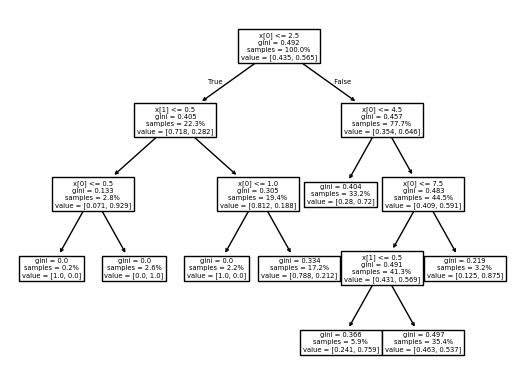

In [6]:
Y = filtered_dataframe_labels['dendrite_type_number']
X = filtered_dataframe_labels[["structure_layer_name_number", "species_number"]]

# print(len(X), len(Y)) # same number of rows
print(filtered_dataframe_labels[0:5])
import numpy as np

X = X.to_numpy()
Y = Y.to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)
print(X_train)

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

list_nodes = [2, 3, 4, 5, 6, 7, 8]
train_accs = []
test_accs = []
for node in list_nodes:
    clf = DecisionTreeClassifier(max_leaf_nodes=node, random_state=0)
    clf.fit(X_train, y_train)
    train_accs.append(clf.score(X_train, y_train))
    test_accs.append(clf.score(X_test, y_test))

from sklearn import tree
tree.plot_tree(clf, proportion=True)
plt.show()

# the tree shows which features it used to split at each node. First it split using the structure layer. if the sample was 
# less than 2.5 it went to the left side(true), and to the right if it was false. then it used the species to split the 
# data into two.

# gini index shoes how mixed the data is. the closer it is to 0.5, the more evenly mixed it is. The first node
# on the tree has a gini index of 0.492, showing that the data is evenly mixed. after each split, the index get smaller.
# this tells us that it is spliting correctly since everytime you split, the variety in data get smaller.


[[ 79 136]
 [ 18 261]]


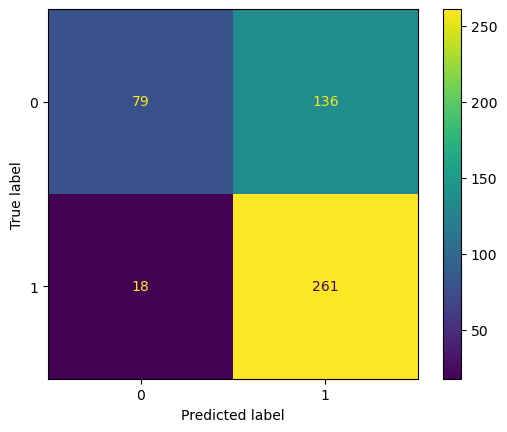

In [7]:
y_pred = clf.predict(X_train)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train, y_pred)
print(matrix)
#fig, ax = plt.subplots()
#ax.imshow(matrix)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train)

0.6882591093117408
0.6209677419354839


<function matplotlib.pyplot.show(close=None, block=None)>

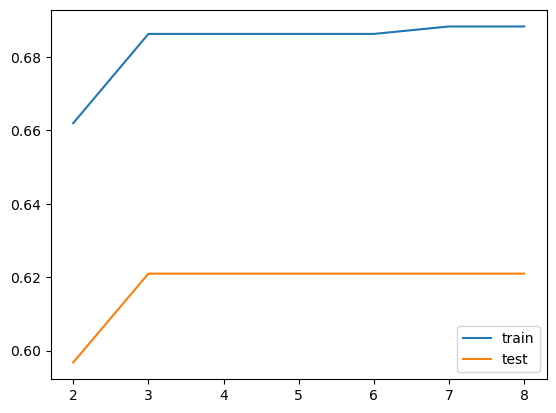

In [8]:
train_acc = clf.score(X_train, y_train)
print(train_acc)

test_acc = clf.score(X_test, y_test)
print(test_acc)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list_nodes, train_accs, label="train")
ax.plot(list_nodes, test_accs, label = "test")
plt.legend()
plt.show


In [9]:
ef_df = get_dataframes()
#print(ef_df)

#print(filtered_dataframe_labels)
filtered_dataframe_labels.set_index("id", inplace=True)
#print(filtered_dataframe_labels)

print(ef_df.columns)
ef_df.set_index("specimen_id", inplace=True)


Index(['adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope',
       'fast_trough_t_long_square', 'fast_trough_t_ramp',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_ramp', 'fast_trough_v_short_square', 'has_burst',
       'has_delay', 'has_pause', 'id', 'input_resistance_mohm', 'latency',
       'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square',
       'peak_v_long_square', 'peak_v_ramp', 'peak_v_short_square',
       'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 'seal_gohm',
       'slow_trough_t_long_square', 'slow_trough_t_ramp',
       'slow_trough_t_short_square', 'slow_trough_v_long_square',
       'slow_trough_v_ramp', 'slow_trough_v_short_square', 'specimen_id',
       'tau', 'threshold_i_long_square', 'threshold_i_ramp',
       'threshold_i_short_square', 'threshold_t_long_square',
       'threshold_t_ramp', 'threshold_t_short_square',
       'threshold_v_long_square', 'threshold_v_ramp',
       'threshold

In [10]:
ef_df.index
filtered_dataframe_labels.index
intersect = np.intersect1d(ef_df.index, filtered_dataframe_labels.index)
print(len(ef_df.index))
print(len(filtered_dataframe_labels.index))
print(len(intersect))



667
618
618


In [11]:
#concat_dataframe = pd.([ef_df, filtered_dataframe_labels], axis = 1)
full_dataframe = pd.merge(ef_df, filtered_dataframe_labels, left_index=True, right_index=True)
print(filtered_dataframe_labels)

y = full_dataframe["dendrite_type"]
x = full_dataframe[["fast_trough_t_ramp", "peak_t_ramp", "threshold_i_ramp", "avg_isi"]]



                species structure_layer_name structure_area_abbrev  \
id                                                                   
485909730  Mus musculus                    5                  VISp   
323865917  Mus musculus                    5                  VISp   
476135066  Mus musculus                    4                  VISp   
502614426  Mus musculus                    4                 VISpl   
519832676  Homo Sapiens                    3                   MTG   
...                 ...                  ...                   ...   
561469082  Homo Sapiens                    5                   MTG   
554807924  Mus musculus                  2/3                  VISp   
512322162  Mus musculus                   6b                  VISp   
601958555  Homo Sapiens                    4                   MTG   
464212183  Mus musculus                    5                  VISp   

          dendrite_type   donor_id  dendrite_type_number  \
id                           

501799874
tstart is greater than the end. Plotting from zero instead


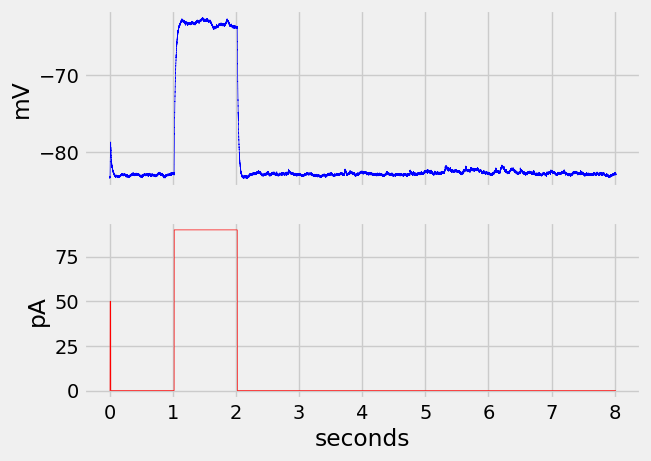

array([<Axes: ylabel='mV'>, <Axes: xlabel='seconds', ylabel='pA'>],
      dtype=object)

In [12]:
%matplotlib inline
from plot_data import plot_data
specimen_id = full_dataframe.iloc[10].name
sweep_number = 35
tstart = 10
tend = 20
print(specimen_id)
plot_data(specimen_id, sweep_number, tstart, tend)